# LSTM-AI4Industry, Edition 2021
Last Update : 15 Janvier 2021

Présentation de l'implémentation de LSTM dans un réseau de neurones avec Keras via un jupyter Notebook

Tache d'apprentissage supervisé de prédiction de symbole

In [10]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, LSTM, Concatenate
from tensorflow.keras.utils import plot_model

**Téléchargement et reshape des données**

Entrainer un réseau de neurone implique de traiter des données.
Ici les données sont téléchagées à partir du fichier "data_samples.npy" qui est un format numpy.
Les données correspondent à une liste de deux listes de même taille. La première liste regroupe les données qui seront fournis en entrée du réseau (des vecteurs binaires de taille 7) et la seconde liste regroupe les sorties attendus (expected outputs) que le réseau doit apprendre à prédire.

Les données sont ensuite segmentées en 3 corpus de taille différentes : 
* Le corpus d'entrainement : 50% du corpus de données d'origine
* Le corpus de validation : 25% du corpus de données d'origine
* Le corpus de test : 25% du corpus de données d'origine

In [11]:
import numpy as np

#loading samples [input, expected_output]
[input_data, output_data] = np.load("data_samples.npy")
print ("Data samples lenght : ")
print (len(input_data))
print (len(output_data))

#Data samples for training
input_train = input_data[:int(len(input_data) * .50)]
output_train = output_data[:int(len(output_data) * .50)]
assert(len(input_train)==len(output_train))
print ("Train data samples lenght : ")
print (len(input_train))
print (len(output_train))

input_train = np.reshape(input_train, (input_train.shape[0], 1, input_train.shape[1]))

#Data samples for validation and testing
in_data = input_data[int(len(input_train)):]
input_val = in_data[:int(len(in_data) * .50)]
input_test = in_data[int(len(input_val)):]

out_data = output_data[int(len(output_train)):]
output_val = out_data[:int(len(out_data) * .50)]
output_test = out_data[int(len(output_val)):]

assert(len(input_val)==len(output_val))
assert(len(input_test)==len(output_test))

input_val = np.reshape(input_val, (input_val.shape[0], 1, input_val.shape[1]))

input_test = np.reshape(input_test, (input_test.shape[0], 1, input_test.shape[1]))

print ("Validation data samples lenght : ")
print (len(input_val))
print (len(output_val))

print ("Test data samples lenght : ")
print (len(input_test))
print (len(output_test))

Data samples lenght : 
576
576
Train data samples lenght : 
288
288
Validation data samples lenght : 
144
144
Test data samples lenght : 
144
144



**Création de l'architecture du réseau**

In [12]:
#Declaration of the shape of the input data which is a tensor
input_tensor = Input(shape=(None, 7))

#Add a LSTM layer with 8 internal units, that has as input the previous tensor declared
lstm_layer_output = LSTM(units=8)(input_tensor)

#Add an output layer, which is a dense layer with 7 units with a sigmoid as an activation function
#this layer take the vector generated from the previous layer as input (ie lstm_layer_output)
output_layer = Dense(7, activation='sigmoid', name='output_layer')(lstm_layer_output)

#Declaration of the model with its input and output
model = Model(inputs=[input_tensor], outputs=[output_layer])

#Display the model with parameters
print("Model :")
print(model.summary())

Model :
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, 7)]         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 512       
_________________________________________________________________
output_layer (Dense)         (None, 7)                 63        
Total params: 575
Trainable params: 575
Non-trainable params: 0
_________________________________________________________________
None


**Représentation graphique de l'architecture**

Il est aussi possible de générer une représentation graphique, plus visuelle, de l'architecture grace à la fonction `plot_model`. Des paramètres peuvent être ajouté pour afficher plus d'informations (tel le format des données entrantes et sortantes de chaque couches).

Pour plus d'informations :https://keras.io/api/utils/model_plotting_utils/ 

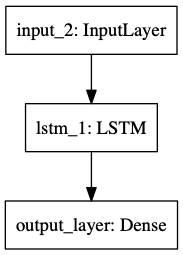

In [13]:
plot_model(model, to_file='mode.png', show_layer_names=True)

Il est important de souligner que le format de données entrantes et sortantes doit être cohérent avec l'architecture des couches d'entrées et de sortie du modèle.

In [14]:
print((input_train.shape))
print((output_train.shape))

(288, 1, 7)
(288, 7)


**Compilation du modèle et lancement de la phase d'apprentissage**

Keras nécessite de compiler un modèle une fois son architecture définie.
Pour cela, la fonction compile nécessite d'indiquer obligatoirement :
* une fonction de perte, i.e, paramètre *loss*
* une fonction d’optimisation,  i.e, paramètre *optimizer*. 

Il est aussi possible d'ajouter une liste de métriques qui seront utilisées
lors de la phase d’apprentissage, i.e paramètre *metrics*. 
Dans l’exemple ci dessous, c'est l'*accuracy* qui mesure la précision des prédictions du modèle qui est utilisé.

Remarque importante : le taux d'apprentissage (tx), paramètre important, n'est pas explicitement défini ici.
Il est implicitement fixé par le choix de l'optimizer.
Par défaut Keras fixe tx=0,01 pour optimizer='adam'.
Pour plus d'informations : https://keras.io/api/optimizers/

In [16]:
#Declaration of the loss used of learning, the optimizer and which metrics to use during learning phase
#the learning rate is not explicitly set here, but depend of the choice of the optimizer. 
#For adam, the learning rate value will be 0.01
model.compile(loss=['mean_squared_error'], optimizer='adam', metrics=['accuracy'])

Une fois le modèle compilé, il est alors prêt à être entrainé en lui spécifiant les données d'entrainement, les données de validation ainsi que les autres paramètres pertinents pour la tache ciblée.

In [17]:
model.fit(input_train,{'output_layer': output_train},
       validation_data=(input_val, {'output_layer': output_val}),
       epochs=10, batch_size=1, verbose=1)

Train on 288 samples, validate on 144 samples
Epoch 1/10
288/288 [==============================] - 4s 13ms/sample - loss: 0.2254 - accuracy: 0.2431 - val_loss: 0.1988 - val_accuracy: 0.2083
Epoch 2/10
288/288 [==============================] - 1s 3ms/sample - loss: 0.1651 - accuracy: 0.2847 - val_loss: 0.1404 - val_accuracy: 0.1875
Epoch 3/10
288/288 [==============================] - 1s 3ms/sample - loss: 0.1257 - accuracy: 0.2708 - val_loss: 0.1212 - val_accuracy: 0.2778
Epoch 4/10
288/288 [==============================] - 1s 3ms/sample - loss: 0.1154 - accuracy: 0.3715 - val_loss: 0.1164 - val_accuracy: 0.2778
Epoch 5/10
288/288 [==============================] - 1s 3ms/sample - loss: 0.1115 - accuracy: 0.3715 - val_loss: 0.1139 - val_accuracy: 0.2778
Epoch 6/10
288/288 [==============================] - 1s 3ms/sample - loss: 0.1086 - accuracy: 0.3715 - val_loss: 0.1124 - val_accuracy: 0.2778
Epoch 7/10
288/288 [==============================] - 1s 3ms/sample - loss: 0.1062 - accu

Enfin pour la phase de test, et ultérieurement la mise en production du modèle, une fois l'apprentissage réalisé et le modèle sauvegardé, il suffit de faire appel à la fonction `predict` pour obtenir les prédictions du réseau.

In [23]:
#Testing of the model
input_test = tf.cast(input_test, tf.float32)
model.predict(input_test)

array([[0.02213836, 0.3020041 , 0.15181598, ..., 0.23874897, 0.0973143 ,
        0.07196128],
       [0.04761323, 0.10738218, 0.10471302, ..., 0.17482743, 0.49605677,
        0.26284546],
       [0.04761323, 0.10738218, 0.10471302, ..., 0.17482743, 0.49605677,
        0.26284546],
       ...,
       [0.02213836, 0.3020041 , 0.15181598, ..., 0.23874897, 0.0973143 ,
        0.07196128],
       [0.04761323, 0.10738218, 0.10471302, ..., 0.17482743, 0.49605677,
        0.26284546],
       [0.04761323, 0.10738218, 0.10471302, ..., 0.17482743, 0.49605677,
        0.26284546]], dtype=float32)